# Multi variate visualization

When visualizations have three or more variables. We can reolve this ambiquity with additional markings but this is unreasonable if we have lots of data. 

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# import data
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [3]:
# inspect the data
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [4]:
# data head
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Non positional encoding for third variables.

We can use 
- shape - color can be used for both qualitative and quantitative variables.
- size - an encoding that is mainly used for numerical variables. It is important to pay attention to the mapping between the variables value to the size of each point
- color - good for categorical variables. Since there is no natural order for shapes, this is an espeially good choice for nominal data. 


There are four major cases to consider when we want to plot three variables together:

1. Three numeric variables
2. two numeric variables and one categorical variable
3. one numeric variable and two categorical variables
4. three categorical variables

A numerical variable is a variable where the value has meaning (i.e., weight or age), but a value such as a phone number doesn't have meaning in the numbers alone. A categorical variable is a variable that holds a type (i.e., species or hair color).

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical.

Three main non-positional encodings stand out:

shape,
size,
color

For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

### Encoding via Shape

Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

In [6]:
fuel_econ.shape

(3929, 20)

In [7]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [8]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x : x.split()[0])

In [9]:
print(fuel_econ.shape)
fuel_econ.head()

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [10]:
fuel_econ.dtypes

id               int64
make            object
model           object
year             int64
VClass        category
drive           object
trans           object
fuelType        object
cylinders        int64
displ          float64
pv2              int64
pv4              int64
city           float64
UCity          float64
highway        float64
UHighway       float64
comb           float64
co2              int64
feScore          int64
ghgScore         int64
trans_type      object
dtype: object

In [11]:
# get a sample of the data
from dataclasses import replace


np.random.seed(2018)
sample= np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

fuel mileage against engine size

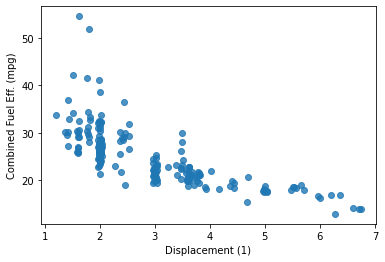

In [12]:
sb.regplot(data = fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

Are there differences betwen cars with automatic transmission and  manual transmission in terms of fuel efficiency and engine size?

Since transmission type is categorical, shape is a good encoding to use. 

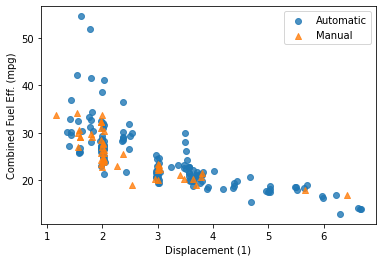

In [19]:
ttype_markers = [['Automatic', 'o'],
                 ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']== ttype]
    sb.regplot(data = plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker = marker);
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

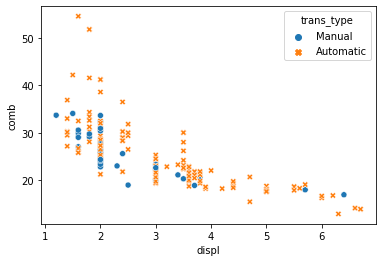

In [18]:
sb.scatterplot(data = fuel_econ_subset, x='displ', y='comb', style='trans_type', hue='trans_type');

The cars with the highest fuel efficiency are all of automatic type. 

### Encoding via Size

Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in scatter. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.)

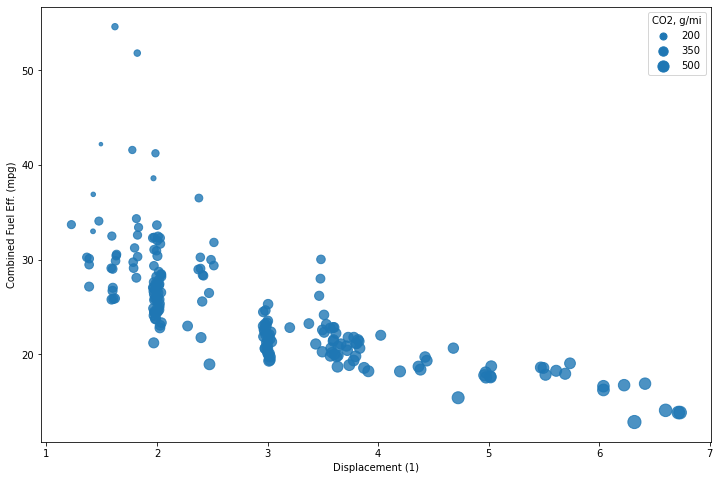

In [24]:
plt.figure(figsize=[12,8])
sb.regplot(data = fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/4});
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

sizes=[200, 350, 500]

base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/4, color=base_color))
plt.legend(legend_obj, sizes, title='CO2, g/mi')

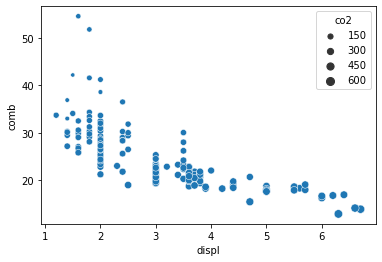

In [25]:
sb.scatterplot(data=fuel_econ_subset, x='displ', y='comb', size='co2');